In [13]:
import pandas as pd
import numpy as np
import os

In [14]:
os.getcwd()

'/Users/zheng/Desktop/my_projects/code'

# Part 1: Data Exploration

In [46]:
#read data
churn_df = pd.read_csv('../dataset/bank_data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
#check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
#check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [49]:
#check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
#understand numerical feature
churn_df[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

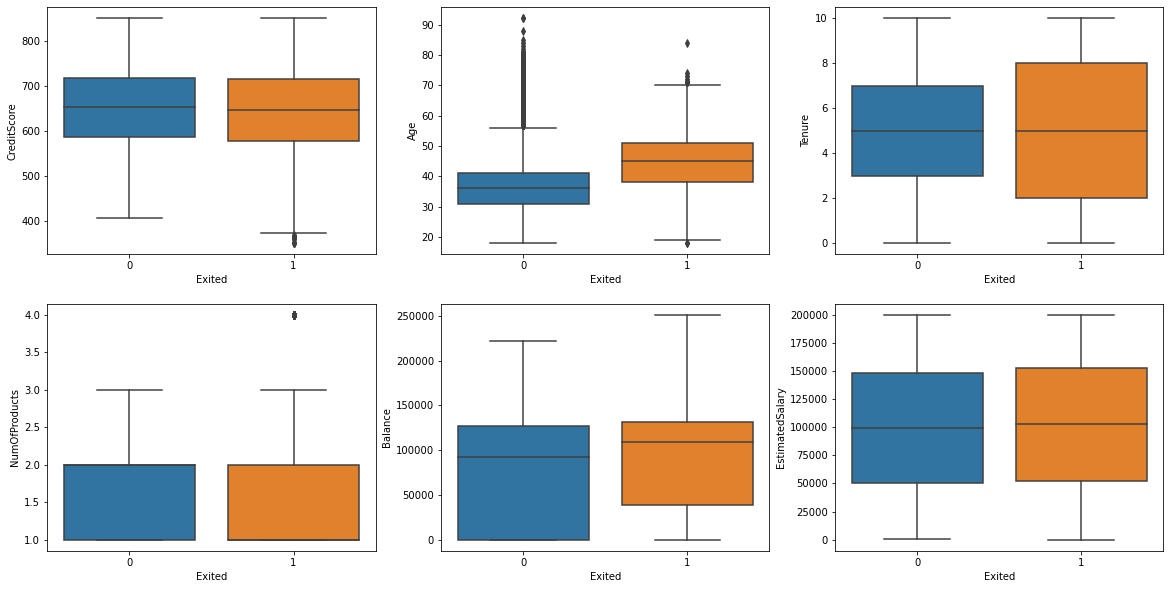

In [51]:
#check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=churn_df, ax=axss[1][2])

<AxesSubplot:xlabel='Exited', ylabel='count'>

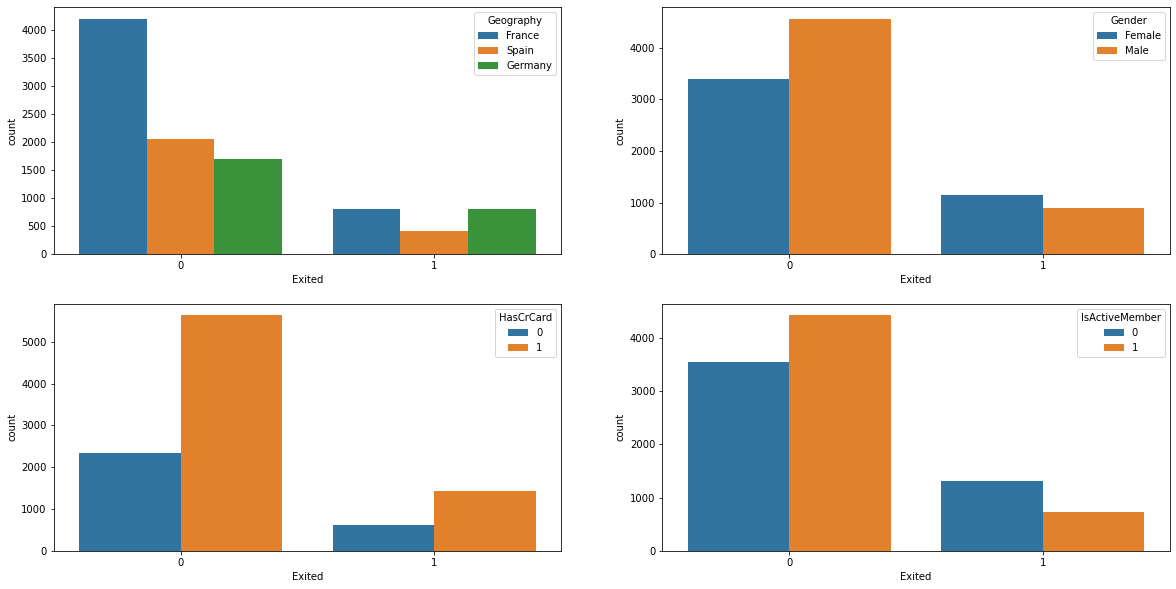

In [52]:
#understand categorical feature
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

In [53]:
#get target variable
y = churn_df['Exited']

# Part 2: Feature Preprocessing

In [54]:
#drop useless features
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop,axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [55]:
#split dataset
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [56]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df,enc,categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)
categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = one_hot_encoding(X_train, enc_ohe, categories)
X_test = one_hot_encoding(X_test, enc_ohe, categories)


X_train.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [57]:
#ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [58]:
#normalize
from sklearn.preprocessing import StandardScaler

num_cols = X.columns[(X.dtypes=='float64')|(X.dtypes=='int64')]
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# Part 3: Model Training

In [62]:
#build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#logistic regression
classifier_logistic = LogisticRegression()
#KNN
classifier_KNN = KNeighborsClassifier()
#random forest
classifier_RF = RandomForestClassifier()

In [66]:
#train the model
classifier_logistic.fit(X_train,y_train)

LogisticRegression()

In [67]:
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
classifier_RF.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
#use grid search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(m):
    print('Best score:' + str(m.best_score_))
    print('Best parameters set:')
    best_parameters = m.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [70]:
#logistic regression-find optimal hyperparameters
parameters = {'penalty':('l1','l2'), 'C':(0.01,0.05,0.1,0.2,1)}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters,cv=5)
Grid_LR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [71]:
#best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score:0.8125333333333333
Best parameters set:
C:0.2
penalty:l1


In [72]:
#best model
best_LR_model = Grid_LR.best_estimator_

In [73]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
best_LR_model.score(X_test,y_test)

0.8096

In [76]:
#KNN-find optimal hyperparameters
parameters = {'n_neighbors':[1,3,5,7,9]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
Grid_KNN.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [77]:
#best n
print_grid_search_metrics(Grid_KNN)

Best score:0.8433333333333334
Best parameters set:
n_neighbors:9


In [80]:
#best model
best_KNN_model = Grid_KNN.best_estimator_

In [82]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
best_KNN_model.score(X_test,y_test)

0.8428

In [86]:
#random forest-find optimal hyperparameters
parameters = {'n_estimators':[60,80,100,120],'max_depth':[1,5,10,15]}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
Grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'n_estimators': [60, 80, 100, 120]})

In [87]:
#best n
print_grid_search_metrics(Grid_RF)

Best score:0.8656
Best parameters set:
max_depth:15
n_estimators:120


In [88]:
#best model
best_RF_model = Grid_RF.best_estimator_

In [89]:
best_RF_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
best_RF_model.score(X_test,y_test)

0.8612

# Part 4: Model Evaluation

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#calculate accuracy, precision, and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp+tn)/(tp+fp+tn+fn+0.0)
    precision = tp/(tp+fp+0.0)
    recall = tp/(tp+fn+0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()


def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [93]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8612
precision is: 0.7892857142857143
recall is: 0.43418467583497056

Logistic Regression
Accuracy is: 0.8096
precision is: 0.6012269938650306
recall is: 0.1925343811394892

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185



In [94]:
#ROC curve of random forest
from sklearn.metrics import roc_curve
from sklearn import metrics

#use predict_proba to get the probability results of random forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf,tpr_rf,_ = roc_curve(y_test, y_pred_rf)

In [95]:
best_RF_model.predict_proba(X_test)

array([[0.74178251, 0.25821749],
       [0.94075443, 0.05924557],
       [0.69260353, 0.30739647],
       ...,
       [0.91791052, 0.08208948],
       [0.94757601, 0.05242399],
       [0.89452592, 0.10547408]])

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'false positive rate')

Text(0, 0.5, 'true positiove rate')

Text(0.5, 1.0, 'ROC curve - RF')

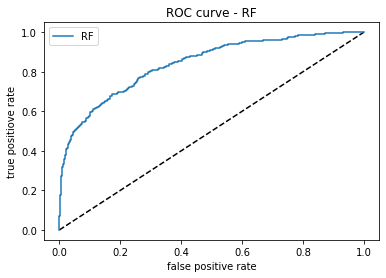

In [96]:
#roc curve of random forest
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positiove rate')
plt.title('ROC curve - RF')
plt.legend(loc='best')
plt.show()

In [98]:
#AUC score
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

0.8420041463599952

In [99]:
#ROC curve of logistic regression

#use predict_proba to get the probability results of random forest
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr,tpr_lr,thresh = roc_curve(y_test, y_pred_lr)

In [101]:
best_LR_model.predict_proba(X_test)

array([[0.82264059, 0.17735941],
       [0.92925292, 0.07074708],
       [0.85486972, 0.14513028],
       ...,
       [0.71582787, 0.28417213],
       [0.89059352, 0.10940648],
       [0.8547524 , 0.1452476 ]])

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'false positive rate')

Text(0, 0.5, 'true positiove rate')

Text(0.5, 1.0, 'ROC curve - LR')

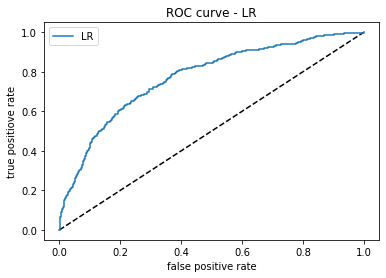

In [102]:
#roc curve of logistic regression
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr,label='LR')
plt.xlabel('false positive rate')
plt.ylabel('true positiove rate')
plt.title('ROC curve - LR')
plt.legend(loc='best')
plt.show()

In [103]:
#AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7720784788917516